In [130]:
import numpy as np
import matplotlib.pyplot as plt


import math
import csv
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

import matplotlib as mpl
import seaborn as sns
from matplotlib import gridspec

#matplotlib.verbose.level = 'debug-annoying'
mpl.rcParams.update({'font.size': 16})
import sys
import os

sns.set_theme()
palette = sns.color_palette('colorblind')
sns.set_context("paper")

sns.set(font_scale=1.5, rc={'text.usetex' : True})
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

In [145]:
corrected = pd.read_table("./data_alex/phi_ew_corrected.txt", skiprows=0, delimiter="\t", names=["File", "Position", "Phi_ew", "Phi_ew_err", "Std", "Std_err"])
uncorrected = pd.read_table("./data_alex/phi_ew_old.txt", skiprows=0, delimiter="\t", names=["File", "Position", "Phi_ew", "Phi_ew_err", "Std", "Std_err"])

In [146]:
corrected

,File,Position,Phi_ew,Phi_ew_err,Std,Std_err
0,1000,R0,-35.250,0.9293,56.34,1.253
1,1222,L0,130.500,0.7174,47.83,0.733
2,1000,R1,-71.250,2.3850,51.54,3.470
3,1222,L1,156.800,1.9240,44.76,1.831
4,1333,C1,-143.600,1.7650,38.70,1.776
5,1000,R2,-2.782,1.8230,41.11,2.213
6,1222,L2,105.800,1.7010,45.47,1.632
7,1333,C2,51.940,1.5820,42.07,1.679


In [ ]:
C2: +45, 
L0: +135, 
C1: -135, 
R0: -45.  
R2: -5, 
R1_ -85,
L2: +95, 
L1: +175.

In [35]:
alphas_val = [-45, 135, -85, 175, -135, -5, 95, 45]

alphas = pd.DataFrame(data=corrected["Position"], columns=["Position"])
alphas["alpha"] = alphas_val

In [64]:
blue = "#5C8EBC"
orange = "#EC9072"

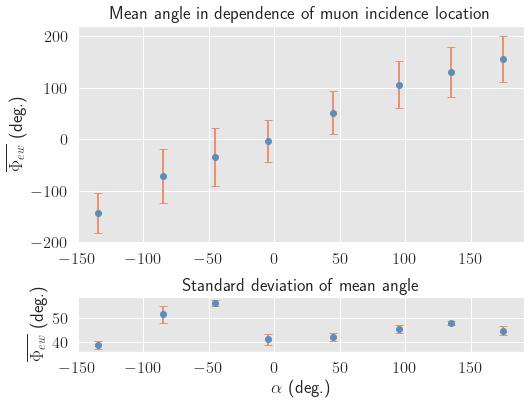

In [153]:
fig = plt.figure(figsize=(8,6))
gs = gridspec.GridSpec(2,1, height_ratios=[4, 1])
gs.update(hspace=0.4)

fig.add_subplot(gs[0])
plt.errorbar(alphas["alpha"], corrected["Phi_ew"], yerr=corrected["Std"], linestyle='None', \
             elinewidth=2, marker="o", color=orange, mfc=blue, mec=blue, capsize=4)
#plt.scatter(alphas["alpha"], corrected["Phi_ew"], marker="o", color=blue)
plt.title(r"Mean angle in dependence of muon incidence location")
plt.ylabel(r"$\overline{\Phi_{ew}}$ (deg.)")
#plt.xlabel(r"$\alpha$ (deg.)")
fig.add_subplot(gs[1])
plt.errorbar(alphas["alpha"], corrected["Std"], yerr=corrected["Std_err"], linestyle='None', \
             elinewidth=2, marker="o", color=orange, mfc=blue, mec=blue, capsize=4)
#plt.scatter(alphas["alpha"], corrected["Phi_ew"], marker="o", color=blue)
plt.title(r"Standard deviation of mean angle")
plt.ylabel(r"$\overline{\Phi_{ew}}$ (deg.)")
plt.xlabel(r"$\alpha$ (deg.)")
fig.savefig("phi_ew_alpha.pdf", dpi=72, bbox_inches="tight")

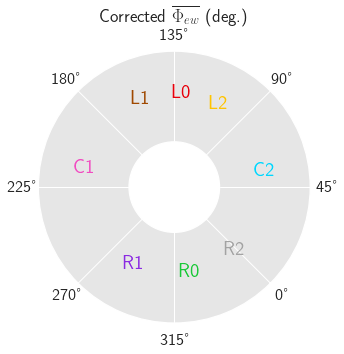

In [150]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='polar')
ax.set_rorigin(-0.5)
ax.set_rticks([])
ax.set_theta_offset(-np.pi/4)
colors = sns.color_palette("bright")
ax.set_title(r"Corrected $\overline{\Phi_{ew}}$ (deg.)")
for i in range(len(corrected)):
    ax.text(np.deg2rad(corrected["Phi_ew"][i]), 1/2, corrected["Position"][i], fontsize=20, color=colors[i+2], horizontalalignment='center')

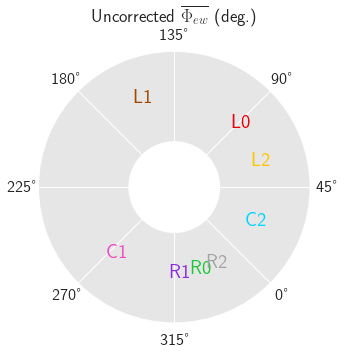

In [151]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='polar')
ax.set_rorigin(-0.5)
ax.set_rticks([])
ax.set_theta_offset(-np.pi/4)
colors = sns.color_palette("bright")
ax.set_title(r"Uncorrected $\overline{\Phi_{ew}}$ (deg.)")
for i in range(len(uncorrected)):
    ax.text(np.deg2rad(uncorrected["Phi_ew"][i]), 1/2, uncorrected["Position"][i], fontsize=20, color=colors[i+2], horizontalalignment='center')